# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Loading Packages </p>


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Data Overview</p>

In [2]:
df = pd.read_csv("/kaggle/input/loan-status-prediction/loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
df.drop("Loan_ID", axis = 1, inplace = True)

In [4]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
# Check whether NaN is or not.
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Delete rows which have NaN.
df.dropna(axis = 0, inplace = True)

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Exploratory Data Analysis</p>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             308 non-null    object 
 1   Married            308 non-null    object 
 2   Dependents         308 non-null    object 
 3   Education          308 non-null    object 
 4   Self_Employed      308 non-null    object 
 5   ApplicantIncome    308 non-null    int64  
 6   CoapplicantIncome  308 non-null    float64
 7   LoanAmount         308 non-null    float64
 8   Loan_Amount_Term   308 non-null    float64
 9   Credit_History     308 non-null    float64
 10  Property_Area      308 non-null    object 
 11  Loan_Status        308 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 31.3+ KB


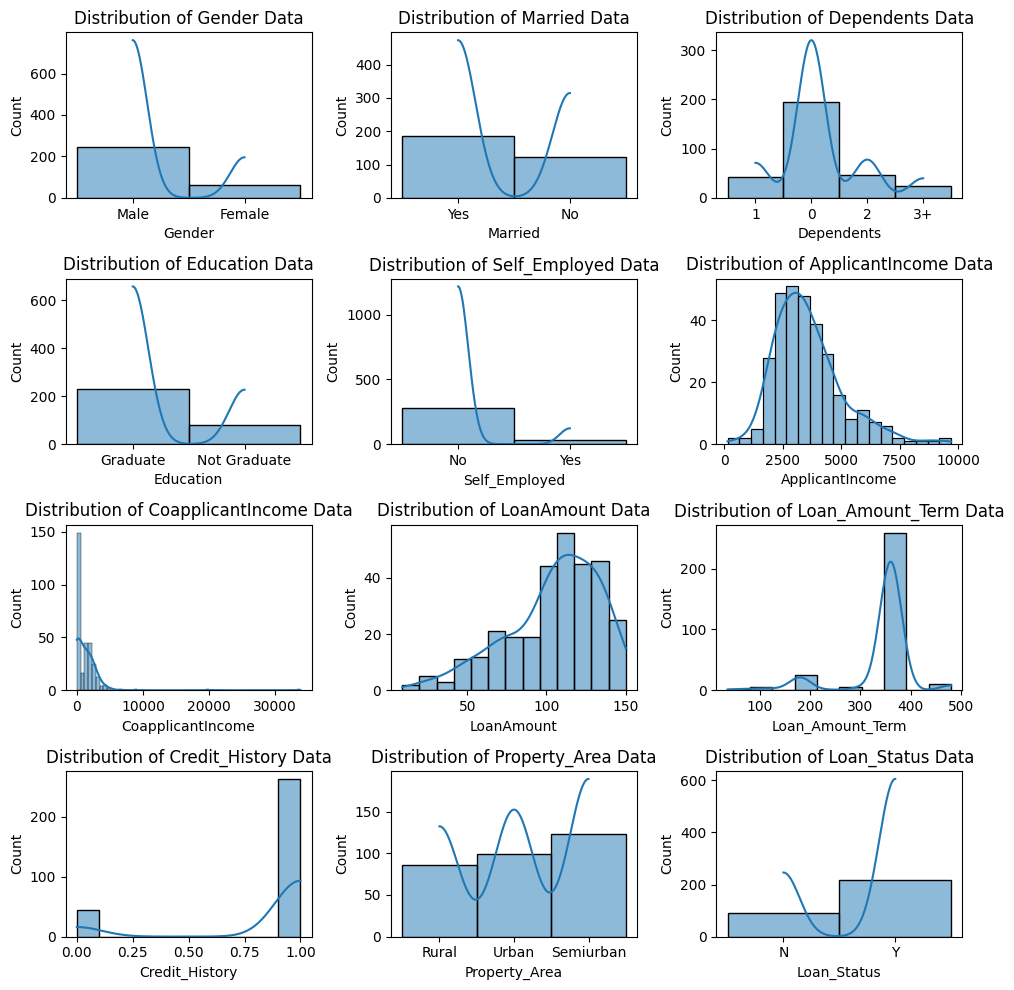

In [8]:
plt.figure(figsize = (10, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde = True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

In [9]:
# "Dependents" has object(3+), so we need this type from object to float.
df["Dependents"].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [10]:
# Preprocessing - LabelEncoder for ML
cat_cols = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for label in cat_cols:
    df[label] = le.fit_transform(df[label])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [11]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,0.795455,0.600649,0.678571,0.256494,0.090909,3599.126623,1278.434805,104.623377,341.181818,0.853896,1.042208,0.711039
std,0.404025,0.490562,0.997029,0.437408,0.287948,1462.359612,2520.961308,29.382256,68.246006,0.353785,0.775125,0.454017
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2568.750000,0.000000,89.750000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3329.500000,871.500000,110.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,4291.000000,1953.500000,128.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000,2.000000,1.000000


In [12]:
df_corr = df.corr()
df_corr["Loan_Status"].sort_values(ascending = False)

Loan_Status          1.000000
Credit_History       0.588029
Married              0.123695
Gender               0.085155
LoanAmount           0.053104
Property_Area        0.034770
ApplicantIncome      0.033927
Dependents           0.031610
CoapplicantIncome   -0.001546
Loan_Amount_Term    -0.009547
Self_Employed       -0.047567
Education           -0.052029
Name: Loan_Status, dtype: float64

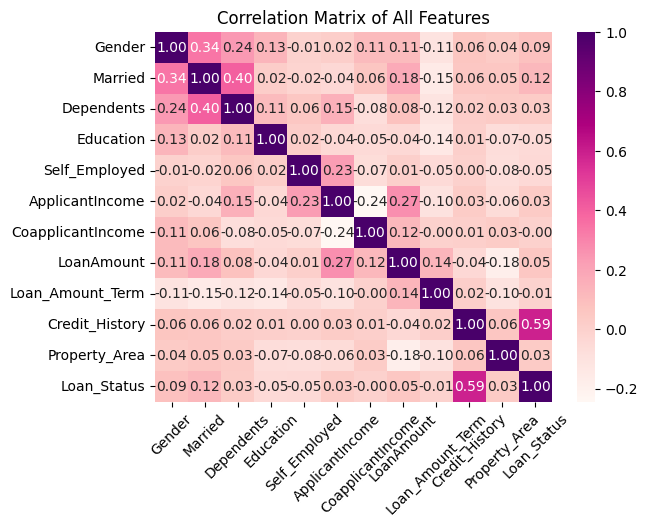

In [13]:
sns.heatmap(df_corr, cmap = "RdPu", annot = True, fmt = ".2f")
plt.title("Correlation Matrix of All Features")
plt.xticks(rotation = 45)
plt.show()

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Model Training</p>


In [14]:
# Preprocessing - Train/Test
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Preprocessing - StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [15]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_reg = reg.predict(X_test)

<Axes: >

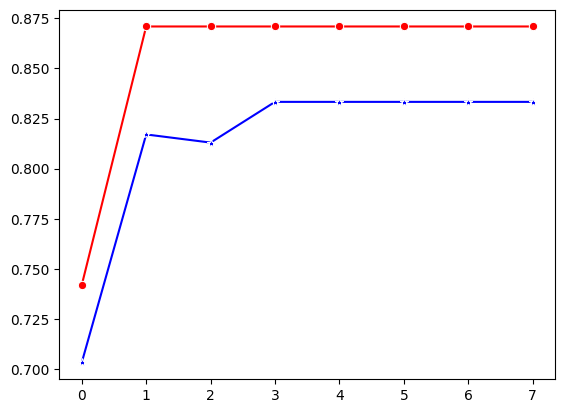

In [16]:
# Let's find parameters which get high train/test score.
import seaborn as sns
train_scores = []
test_scores = []
for i in range(2, 10):
    reg = LogisticRegression(max_iter = i * 20, C = i/10)
    reg.fit(X_train, y_train)
    
    train_scores.append(reg.score(X_train, y_train))
    test_scores.append(reg.score(X_test, y_test))
sns.lineplot(train_scores, marker = '*', color = 'b')
sns.lineplot(test_scores, marker = 'o', color = 'r')

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Accuracy Score</p>


In [17]:
from sklearn.metrics import roc_auc_score
y_pred_prob = reg.predict_proba(X_test)[:, 1]
print("ROC_AUC_SCORE : ", roc_auc_score(y_test, y_pred_prob))

ROC_AUC_SCORE :  0.8355978260869565


# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Confusion Matrix</p>


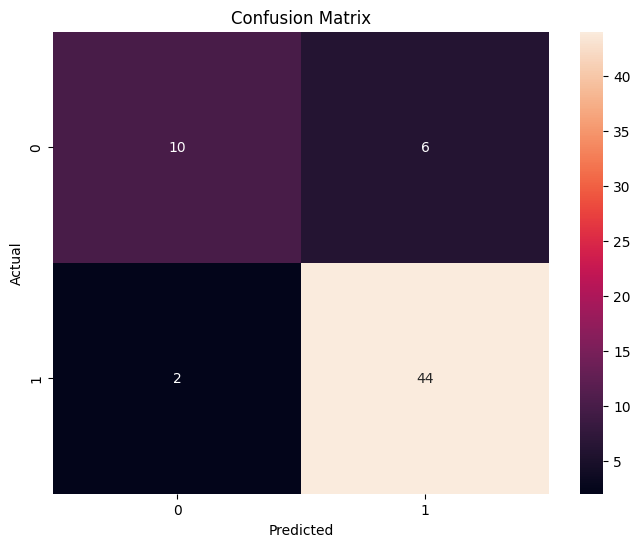

In [18]:
y_pred = reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()